In [23]:
from pykrx.stock import get_market_fundamental_by_ticker, get_market_ohlcv_by_ticker
import datetime

# 1. 날짜 설정 (YYYYMMDD 형식)
target_date = "20241230"

# 오늘 기준 KOSPI PER 데이터 가져오기
data = get_market_fundamental_by_ticker(date = target_date, market="KOSPI")

# 4. PER 값이 있는 종목만 필터링 (NaN 또는 0 제거)
df = df[df["PER"] > 0]

# PER 기준 오름차순 정렬 (PER > 0 조건 추천)
data = data[data['PER'] > 0].sort_values(by='PER').head(30)

print(data[['PER']])



         PER
티커          
005440  0.41
016710  0.74
000540  0.79
085310  1.14
007860  1.30
021820  1.31
092790  1.36
003560  1.59
010060  1.61
001230  1.64
210980  1.73
306200  1.79
017940  1.86
008260  1.99
019180  2.00
010100  2.00
200880  2.02
000400  2.09
001130  2.09
004960  2.32
378850  2.35
016380  2.36
008420  2.41
013580  2.42
092230  2.47
047040  2.49
071320  2.51
004690  2.53
123700  2.55
002780  2.56


In [24]:
# 문자열 형태로 6자리 맞춰주기 (KRX는 6자리 티커 사용)
import pandas as pd


df = pd.DataFrame(data)

# 인덱스를 열로 복원, 기존에는 티커를 인덱스로 사용
df = df.reset_index()

df = df.reset_index()
print(df.columns)

Index(['index', '티커', 'BPS', 'PER', 'PBR', 'EPS', 'DIV', 'DPS'], dtype='object')


In [25]:
from pykrx.stock import get_market_ticker_name
# 티커 문자열 6자리 정리
df['티커'] = df['티커'].astype(str).str.zfill(6)

# 회사명 열 추가
df['회사명'] = df['티커'].apply(get_market_ticker_name)

# 결과 출력
print(df[['티커', '회사명', 'PER']])

        티커       회사명   PER
0   005440  현대지에프홀딩스  0.41
1   016710     대성홀딩스  0.74
2   000540      흥국화재  0.79
3   085310       엔케이  1.14
4   007860        서연  1.30
5   021820      세원정공  1.31
6   092790       넥스틸  1.36
7   003560       IHQ  1.59
8   010060    OCI홀딩스  1.61
9   001230     동국홀딩스  1.64
10  210980     SK디앤디  1.73
11  306200      세아제강  1.79
12  017940        E1  1.86
13  008260      NI스틸  1.99
14  019180     티에이치엔  2.00
15  010100    한국무브넥스  2.00
16  200880      서연이화  2.02
17  000400    롯데손해보험  2.09
18  001130      대한제분  2.09
19  004960      한신공영  2.32
20  378850    화승알앤에이  2.35
21  016380      KG스틸  2.36
22  008420      문배철강  2.41
23  013580      계룡건설  2.42
24  092230    KPX홀딩스  2.47
25  047040      대우건설  2.49
26  071320    지역난방공사  2.51
27  004690       삼천리  2.53
28  123700       SJM  2.55
29  002780      진흥기업  2.56


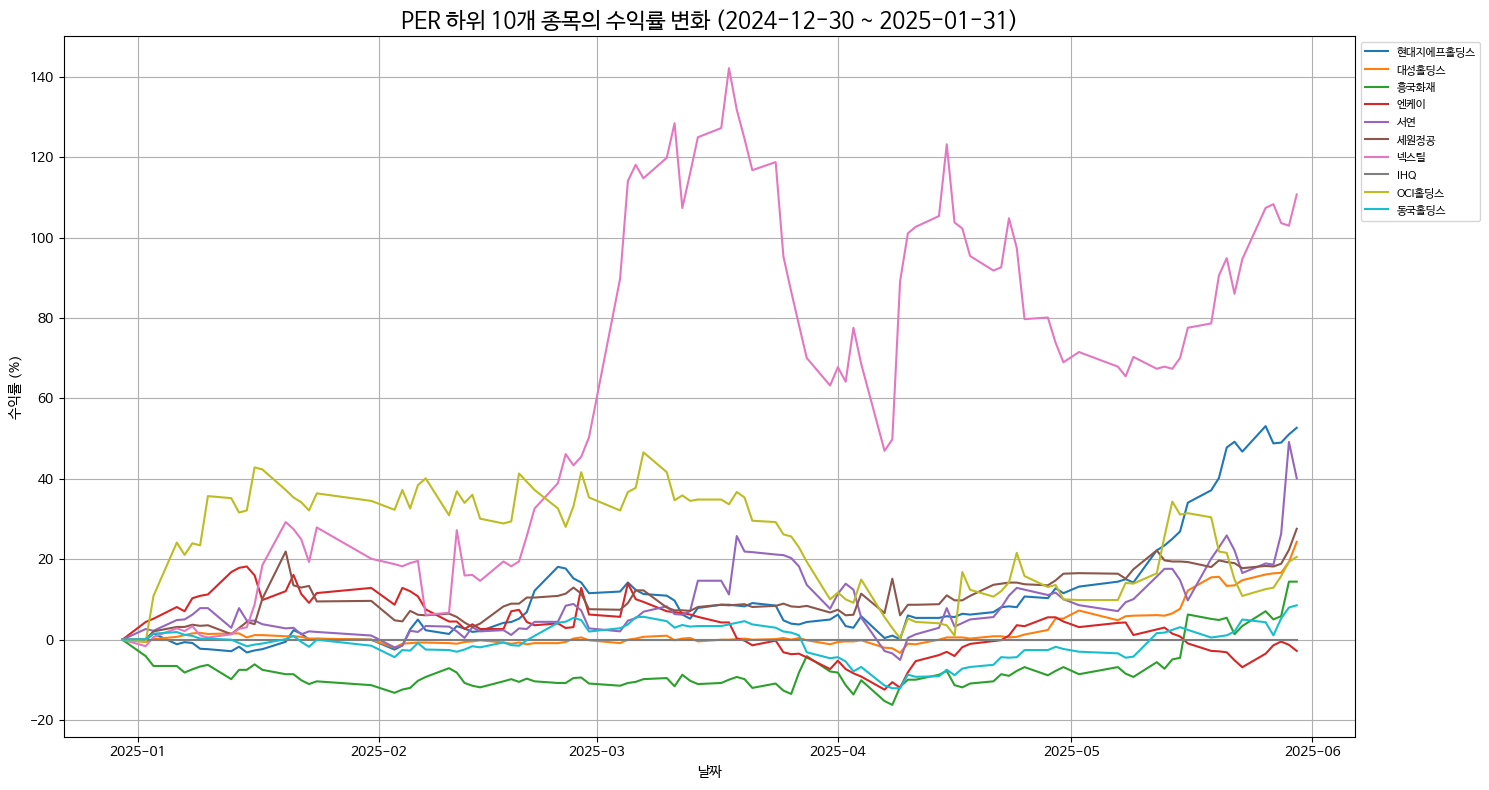

In [34]:
import matplotlib.pyplot as plt
from pykrx.stock import get_market_fundamental_by_ticker, get_market_ohlcv_by_date, get_market_ticker_name

# 1. 기준 날짜 설정 (PER 기준일 + 수익률 시작일)
base_date = "20241230"  # 기준일 (마지막 영업일)
end_date = "20250531"   # 수익률 추적 종료일 (1개월 뒤)

# 2. PER 하위 10개 종목 가져오기
df_top10 = df[0:10]
tickers = df_top10['티커'].tolist()  # ✅ '티커' 열에서 리스트 추출


# 3. 수익률 계산
returns = {}
for ticker in tickers:
    try:
        price_df = get_market_ohlcv_by_date(base_date, end_date, ticker)
        start_price = price_df.iloc[0]['종가']
        price_df['수익률'] = (price_df['종가'] - start_price) / start_price * 100
        returns[ticker] = price_df['수익률']
    except:
        print(f"오류: {ticker} 데이터 없음")
        continue

# 4. 수익률 데이터프레임으로 변환
returns_df = pd.DataFrame(returns)
returns_df.index = pd.to_datetime(returns_df.index)

# 5. 회사명 매핑
name_map = {ticker: get_market_ticker_name(ticker) for ticker in returns_df.columns}
returns_df.rename(columns=name_map, inplace=True)

# 6. 시각화
plt.figure(figsize=(15, 8))
for col in returns_df.columns:
    plt.plot(returns_df.index, returns_df[col], label=col)

plt.title("PER 하위 10개 종목의 수익률 변화 (2024-12-30 ~ 2025-01-31)", fontsize=16)
plt.xlabel("날짜")
plt.ylabel("수익률 (%)")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=8)
plt.grid(True)
plt.tight_layout()
plt.show()
